In [215]:
import matplotlib.pyplot as plt
import torchvision
from pathlib import Path
import torch

from torch import nn
from torchvision import transforms
from scripts import data_setup, engine, utils
import torchinfo

In [216]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
data_path = Path("data/")
image_path = data_path / "soil_images_sorted"

In [218]:
# Get a set of pretrained model weights
weights = torchvision.models.GoogLeNet_Weights.DEFAULT
weights
# Get the transforms used to create our pretrained weights
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [219]:
# Setup Dirs
train_dir = image_path / "train"
test_dir = image_path / "test"

In [220]:
#HyperParameters
batch_Size = 6
learning_rate = 0.0001
epochS = 30
dropout_prob = 0.6

In [221]:
# Create training and testing DataLoaders as well as get a list of class names
train_dataloader, test_dataloader, class_names = data_setup.create_dataloaders(train_dir=train_dir,
                                                                               test_dir=test_dir,
                                                                               transform=auto_transforms, # perform same data transforms on our own data as the pretrained model
                                                                               batch_size=batch_Size)

train_dataloader, test_dataloader, class_names

(<torch.utils.data.dataloader.DataLoader at 0x26342b7ff80>,
 ['high', 'low', 'medium'])

In [222]:
model = torchvision.models.googlenet(weights=weights).to(device)

In [223]:
# # Freeze all base layers in the "features" section of the model (the feature extractor) by setting requires_grad=False
# for name, param in model.named_parameters():
#     if "fc" not in name and "aux" not in name:  # Exclude the fully connected and auxiliary layers
#         param.requires_grad = False

In [224]:
# Get the length of class_names (one output unit for each class)
output_shape = len(class_names)

# Recreate the classifier layer and seed it to the target device
model.classifier = nn.Sequential(
    nn.Dropout(p=dropout_prob, inplace=True), 
    nn.Linear(in_features=25088, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [225]:
# Define loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [226]:

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Setup training and save the results
results = engine.train(model=model,
                       train_dataloader=train_dataloader,
                       test_dataloader=test_dataloader,
                       optimizer=optimizer,
                       loss_fn=loss_fn,
                       epochs=epochS,
                       device=device)

# End the timer and print out how long it took
end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

  3%|▎         | 1/30 [00:21<10:11, 21.08s/it]

Epoch: 1 | train_loss: 6.8547 | train_acc: 0.0000 | test_loss: 6.3994 | test_acc: 0.0833


  7%|▋         | 2/30 [00:41<09:33, 20.49s/it]

Epoch: 2 | train_loss: 4.5626 | train_acc: 0.3333 | test_loss: 4.3378 | test_acc: 0.2708


 10%|█         | 3/30 [01:01<09:07, 20.29s/it]

Epoch: 3 | train_loss: 2.4306 | train_acc: 0.7857 | test_loss: 2.9149 | test_acc: 0.6458


 13%|█▎        | 4/30 [01:21<08:44, 20.18s/it]

Epoch: 4 | train_loss: 1.6579 | train_acc: 0.7500 | test_loss: 1.8758 | test_acc: 0.7708


 17%|█▋        | 5/30 [01:42<08:33, 20.54s/it]

Epoch: 5 | train_loss: 0.9319 | train_acc: 0.8214 | test_loss: 1.4543 | test_acc: 0.8125


 20%|██        | 6/30 [02:02<08:13, 20.54s/it]

Epoch: 6 | train_loss: 0.5588 | train_acc: 0.9524 | test_loss: 1.2710 | test_acc: 0.8125


 23%|██▎       | 7/30 [02:22<07:42, 20.13s/it]

Epoch: 7 | train_loss: 0.3081 | train_acc: 0.9405 | test_loss: 1.0826 | test_acc: 0.8125


 27%|██▋       | 8/30 [02:41<07:19, 19.98s/it]

Epoch: 8 | train_loss: 0.2786 | train_acc: 0.9286 | test_loss: 0.9231 | test_acc: 0.8542


 30%|███       | 9/30 [03:02<07:05, 20.26s/it]

Epoch: 9 | train_loss: 0.3250 | train_acc: 0.9167 | test_loss: 0.9626 | test_acc: 0.8542


 33%|███▎      | 10/30 [03:22<06:40, 20.04s/it]

Epoch: 10 | train_loss: 0.2312 | train_acc: 0.9524 | test_loss: 0.8502 | test_acc: 0.8542


 37%|███▋      | 11/30 [03:42<06:24, 20.23s/it]

Epoch: 11 | train_loss: 0.1946 | train_acc: 0.9405 | test_loss: 0.7604 | test_acc: 0.9167


 40%|████      | 12/30 [04:02<05:59, 19.96s/it]

Epoch: 12 | train_loss: 0.1454 | train_acc: 0.9881 | test_loss: 0.7684 | test_acc: 0.8958


 43%|████▎     | 13/30 [04:21<05:34, 19.65s/it]

Epoch: 13 | train_loss: 0.2404 | train_acc: 0.9405 | test_loss: 0.6706 | test_acc: 0.8958


 47%|████▋     | 14/30 [04:40<05:11, 19.49s/it]

Epoch: 14 | train_loss: 0.2849 | train_acc: 0.9524 | test_loss: 0.8509 | test_acc: 0.8542


 50%|█████     | 15/30 [04:59<04:51, 19.44s/it]

Epoch: 15 | train_loss: 0.1456 | train_acc: 0.9405 | test_loss: 0.7246 | test_acc: 0.8542


 53%|█████▎    | 16/30 [05:19<04:35, 19.66s/it]

Epoch: 16 | train_loss: 0.2160 | train_acc: 0.9524 | test_loss: 0.7152 | test_acc: 0.8958


 57%|█████▋    | 17/30 [05:38<04:12, 19.41s/it]

Epoch: 17 | train_loss: 0.2223 | train_acc: 0.9405 | test_loss: 0.7231 | test_acc: 0.8958


 60%|██████    | 18/30 [05:57<03:50, 19.23s/it]

Epoch: 18 | train_loss: 0.1462 | train_acc: 0.9762 | test_loss: 0.7136 | test_acc: 0.8958


 63%|██████▎   | 19/30 [06:16<03:31, 19.20s/it]

Epoch: 19 | train_loss: 0.1188 | train_acc: 0.9524 | test_loss: 0.6311 | test_acc: 0.8958


 67%|██████▋   | 20/30 [06:37<03:16, 19.65s/it]

Epoch: 20 | train_loss: 0.0721 | train_acc: 0.9762 | test_loss: 0.5666 | test_acc: 0.8958


 70%|███████   | 21/30 [06:58<03:00, 20.08s/it]

Epoch: 21 | train_loss: 0.1704 | train_acc: 0.9643 | test_loss: 0.7800 | test_acc: 0.8958


 73%|███████▎  | 22/30 [07:18<02:39, 19.95s/it]

Epoch: 22 | train_loss: 0.0467 | train_acc: 1.0000 | test_loss: 0.6799 | test_acc: 0.8958


 77%|███████▋  | 23/30 [07:37<02:19, 19.92s/it]

Epoch: 23 | train_loss: 0.0539 | train_acc: 0.9881 | test_loss: 0.5911 | test_acc: 0.8958


 80%|████████  | 24/30 [07:58<02:00, 20.12s/it]

Epoch: 24 | train_loss: 0.0320 | train_acc: 1.0000 | test_loss: 0.5969 | test_acc: 0.8958


 83%|████████▎ | 25/30 [08:19<01:42, 20.50s/it]

Epoch: 25 | train_loss: 0.0966 | train_acc: 0.9643 | test_loss: 0.6720 | test_acc: 0.8958


 87%|████████▋ | 26/30 [08:41<01:23, 20.80s/it]

Epoch: 26 | train_loss: 0.0420 | train_acc: 0.9881 | test_loss: 0.6500 | test_acc: 0.8542


 90%|█████████ | 27/30 [09:01<01:01, 20.51s/it]

Epoch: 27 | train_loss: 0.0459 | train_acc: 1.0000 | test_loss: 0.6670 | test_acc: 0.8542


 93%|█████████▎| 28/30 [09:21<00:40, 20.38s/it]

Epoch: 28 | train_loss: 0.0774 | train_acc: 0.9643 | test_loss: 0.6489 | test_acc: 0.8958


 97%|█████████▋| 29/30 [09:41<00:20, 20.38s/it]

Epoch: 29 | train_loss: 0.0329 | train_acc: 0.9881 | test_loss: 0.6693 | test_acc: 0.8958


100%|██████████| 30/30 [10:01<00:00, 20.05s/it]

Epoch: 30 | train_loss: 0.0841 | train_acc: 0.9643 | test_loss: 0.5604 | test_acc: 0.8542
[INFO] Total training time: 601.455 seconds


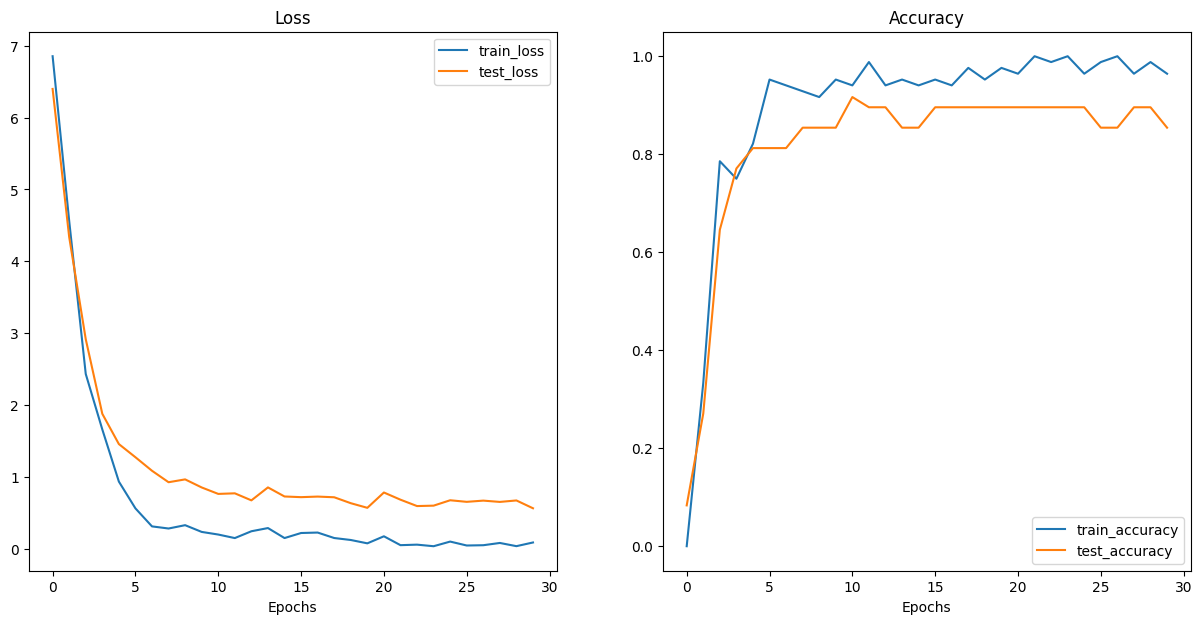

In [227]:
from scripts.helper_functions import plot_loss_curves

plot_loss_curves(results)

In [228]:
from winsound import Beep
Beep(300, 200)